In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [30]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df_train.shape


(891, 12)

In [33]:
# Hence, we can say that 11 features and 1 target variable('Survived')

# number of missing values in each column
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
# since most of the values in 'Cabin' column are missing, we prefer to drop the column
df_train = df_train.drop('Cabin', axis = 1)

In [35]:
# we can replace missing values in 'Age' column with mean
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

<ipython-input-35-5092a5b9d614>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)


In [37]:
print(df_train['Embarked'].mode()[0])

S


In [39]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

<ipython-input-39-083dad81dc60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)


In [40]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [43]:
# categorical data do not need to be determined on the basis of mean, median
# only contiguos data is required i.e. 'Age' and 'Fare'
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
sns.set()

In [47]:
#No. of people survived
df_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

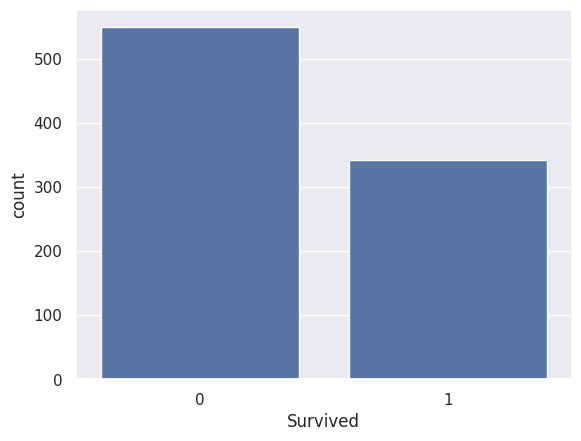

In [55]:
# making a bar graph for count of no. of survival
sns.countplot(x = 'Survived', data = df_train)

In [57]:
df_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

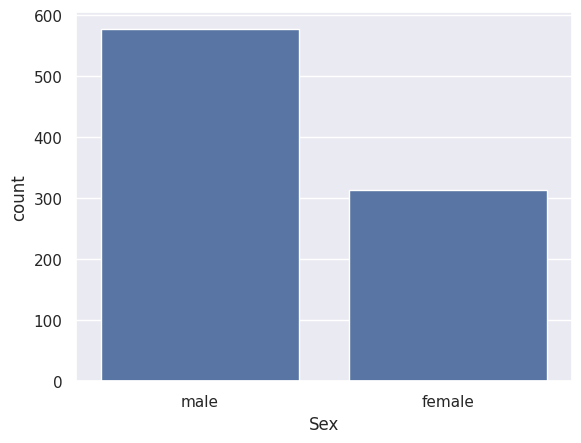

In [58]:
sns.countplot(x='Sex', data=df_train)

<Axes: xlabel='Sex', ylabel='count'>

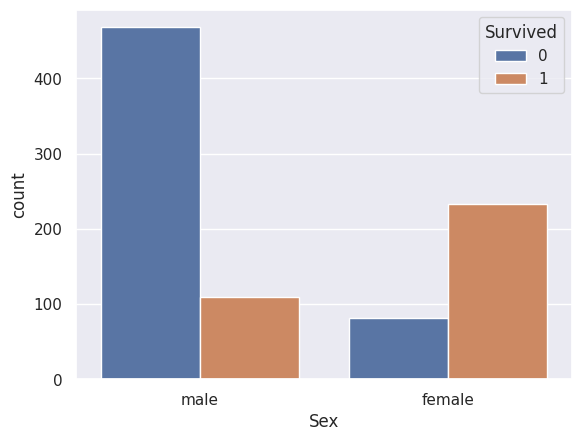

In [59]:
sns.countplot(x='Sex', hue='Survived', data = df_train)

In [61]:
df_train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

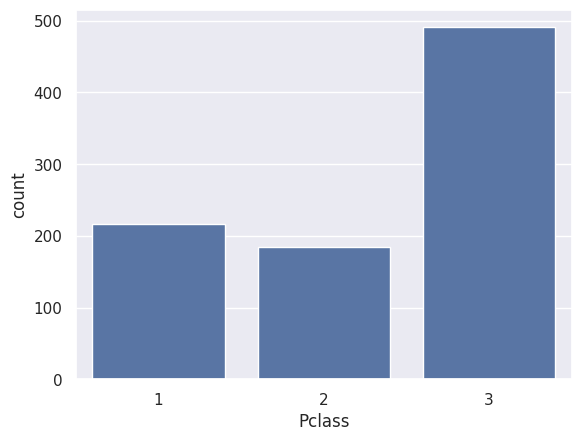

In [62]:
sns.countplot( x = 'Pclass', data = df_train)

<Axes: xlabel='Pclass', ylabel='count'>

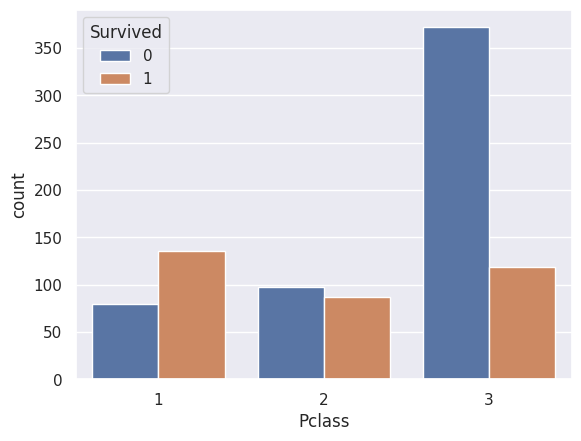

In [63]:
sns.countplot(x='Pclass', hue = 'Survived', data = df_train)

In [64]:
df_train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp', ylabel='count'>

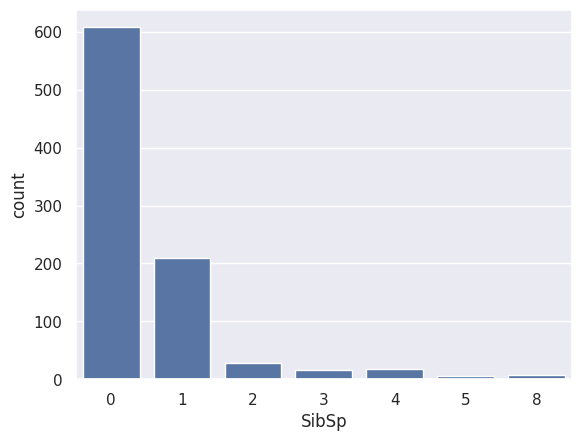

In [65]:
sns.countplot(x='SibSp', data = df_train)

<Axes: xlabel='SibSp', ylabel='count'>

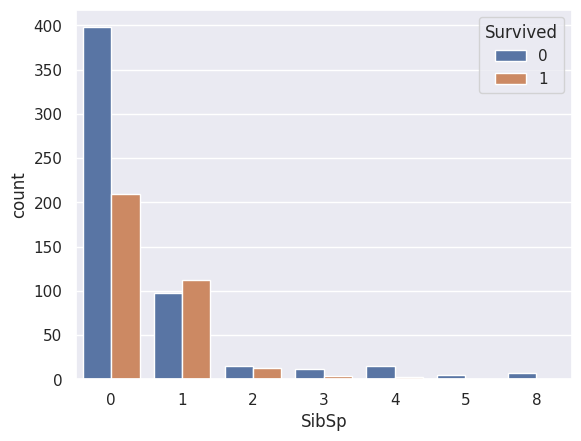

In [66]:
sns.countplot(x='SibSp', hue = 'Survived', data = df_train)

In [67]:
df_train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='Parch', ylabel='count'>

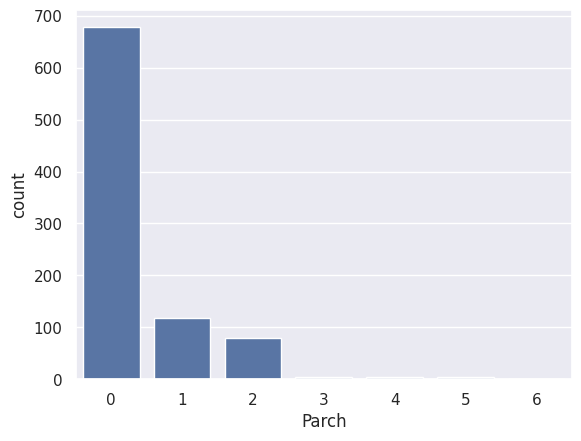

In [68]:
sns.countplot(x='Parch', data = df_train)

<Axes: xlabel='Parch', ylabel='count'>

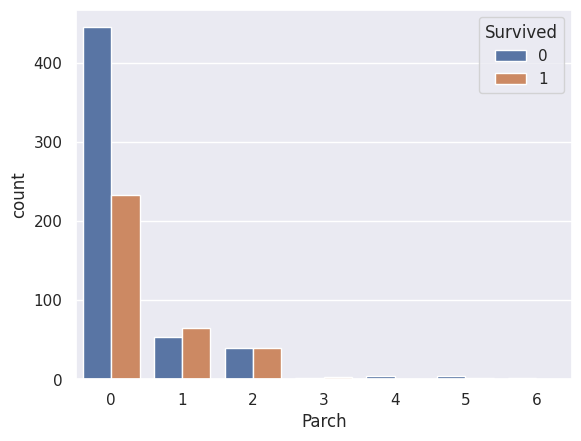

In [69]:
sns.countplot(x='Parch', hue = 'Survived',data=df_train)

In [70]:
df_train['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


<Axes: xlabel='Embarked', ylabel='count'>

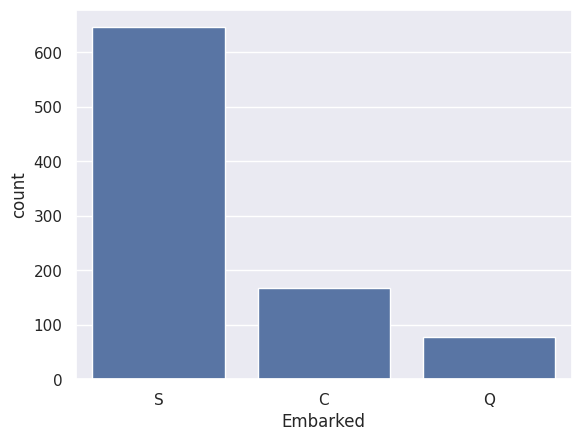

In [71]:
sns.countplot(x='Embarked', data = df_train)

<Axes: xlabel='Embarked', ylabel='count'>

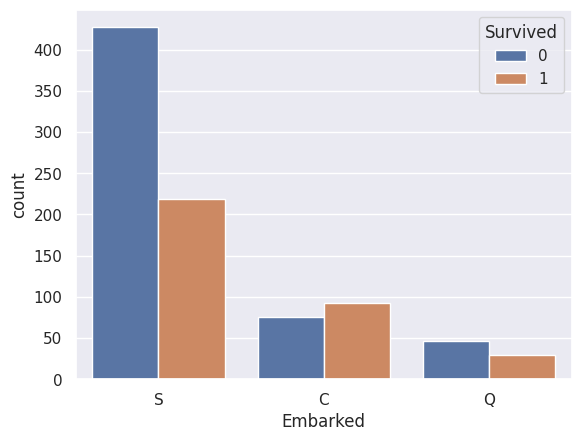

In [72]:
sns.countplot(x='Embarked', hue = 'Survived', data = df_train)

In [73]:
# Encoding categorical Columns

df_train.replace({'Sex': {'male': 0, 'female':1}}, inplace = True)

<ipython-input-73-adc6861a7ccd>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({'Sex': {'male': 0, 'female':1}}, inplace = True)


In [82]:
# Separate features and Target variable

X = df_train.drop(columns = ['PassengerId','Survived','Name','Ticket'])
Y = df_train['Survived']

In [83]:
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [76]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [84]:
# MODEL TRAINING

model = LogisticRegression()

In [85]:
df_train.replace({'Embarked': {'S': 0, 'C':1, 'Q':2}}, inplace = True)


In [86]:
model.fit(X, Y)

LogisticRegression()

In [88]:
Y_train_prediction = model.predict(X)

In [89]:
training_data_accuracy = accuracy_score(Y, Y_train_prediction)

In [90]:
training_data_accuracy

0.8047138047138047

In [91]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [92]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [93]:
df_test.drop('Cabin', axis = 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [97]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

<ipython-input-97-455d33b384ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)


In [98]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)

<ipython-input-98-ab579095383f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)


In [99]:
df_test.replace({'Sex': {'male':0,'female':1}}, inplace = True)

<ipython-input-99-7662cb14a439>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace({'Sex': {'male':0,'female':1}}, inplace = True)


In [100]:
df_test.replace({'Embarked': {'S': 0, 'C':1, 'Q':2}}, inplace = True)


<ipython-input-100-365b3c4fdead>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace({'Embarked': {'S': 0, 'C':1, 'Q':2}}, inplace = True)


In [104]:
X_test = df_test.drop(columns = ['PassengerId','Name','Ticket','Cabin'])

In [105]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [106]:
Y_test = model.predict(X_test)

In [107]:
Y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [108]:
Y_test_original = pd.read_csv('gender_submission.csv')

In [109]:
accuracy_check = accuracy_score(Y_test_original['Survived'], Y_test)

In [110]:
accuracy_check

0.9425837320574163

In [111]:
# Create a DataFrame with 'PassengerId' and 'Survived' (Y_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': Y_test})

# Save the DataFrame to a CSV file named 'submission.csv'
submission.to_csv('submission.csv', index=False)



In [112]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
